# **HYPOTHYROID ANALYSIS**

## Defining the question:

Given the data, we are to build a machine learning model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



## Understanding the Context:
Hypothyroidism is a condition in which the thyroid gland doesn't produce enough thyroid hormone.
Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women.

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. From the data collected during the tests, we are to build a model that will predict whether a patient has hypothyroidsm based on the symptoms provided.

## Metric for success:
Being able to correctly predict hypothyroidsm in a patient by building a machine learning model using at least 2 out of the 3 advanced models: Random forests, Ada boosted trees, and gradient boosted trees. We will also use the SVM model.

We will then decide which of the models will be most suitable for prediction by evaluating the models accuracy.

## Experimental design:
- Loading & Viewing the Data
- Data Cleaning
- Exploratory Data Analysis:
- Feature Engineering
Modelling:
- Random Forest Classifier
- Ada Boost Classifier
- Gradient Boosting Classifier
- Support Vector Classifier
- Tuning the best model
- Conclusion

## Loading our dataset

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading our dataset
hypo = pd.read_csv('/content/hypothyroid.csv')

In [4]:
# previewing the top of our dataset
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
# checking shape of our dataset
hypo.shape

(3163, 26)

We have 3163 observations and 26 features.

In [6]:
# checking unique values in our columns
for i in hypo.columns:
 print(f'Column: {i} \n') 
 print(hypo[i].unique())
 print("\n")

Column: status 

['hypothyroid' 'negative']


Column: age 

['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


Column: sex 

['M' 'F' '?']


Column: on_thyroxine 

['f' 't']


Column: query_on_thyroxine 

['f' 't']


Column: on_antithyroid_medication 

['f' 't']


Column: thyroid_surgery 

['f' 't']


Column: query_hypothyroid 

['f' 't']


Column: query_hyperthyroid 

['f' 't']


Column: pregnant 

['f' 't']


Column: sick 

['f' 't']


Column: tumor 

['f' 't']


Column: lithium 

['f' 't']


Column: goitre 

['f' 't']


Column: TSH_measured 

['y' 'n']


Column: TSH 

['30' 

In [7]:
# checking the dtypes 
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## Tidying dataset

In [8]:
# Using the same format for all column names by:
# Renaming the columns to combine the names of the columns into a single word and lowering the case

hypo.columns = hypo.columns.str.lower().str.replace(' ', '_')

In [9]:
# replacing values with null
hypo.replace('?',np.NaN,inplace= True)

In [10]:
# checking null values
hypo.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           468
t3_measured                     0
t3                            695
tt4_measured                    0
tt4                           249
t4u_measured                    0
t4u                           248
fti_measured                    0
fti                           247
tbg_measured                    0
tbg                          2903
dtype: int64

In [11]:
# dealing with age null values by filling the null values with the median in the age column
hypo['age']= hypo['age'].fillna(hypo['age'].median(), axis = 0)

In [12]:
# Dealing with null values in the sex column replacing null with 'Unknown'
def impute_nan(hypo,ColName):
    hypo[ColName] = np.where(hypo[ColName].isnull(),"Unknown",hypo[ColName])
## Call function to create new category for variables
for Columns in ['sex']:
    impute_nan(hypo,Columns)
# Display result
hypo['sex'].unique()

array(['M', 'F', 'Unknown'], dtype=object)

In [13]:
# checking tbg measured column observations
hypo.tbg_measured.value_counts()

n    2903
y     260
Name: tbg_measured, dtype: int64

tbg has >90% of its observations as null this is because majority of the individuals did not test for tbg.  We will drop these columns.

In [14]:
# dropping column tbg
hypo.drop(columns = ['tbg_measured','tbg'],inplace = True)

In [15]:
# Check total number null values 
hypo.isnull().sum().sum()

1907

In [16]:
# checking the null values in each column
columns = hypo[["age","tsh_measured","t3_measured","tt4_measured","t4u_measured","fti_measured"]]
for i in columns:
  print(f'Column: {i} \n') 
  print(hypo[i].value_counts())

Column: age 

54.0    446
59       64
60       64
62       63
28       60
       ... 
97        1
98        1
5         1
93        1
90        1
Name: age, Length: 93, dtype: int64
Column: tsh_measured 

y    2695
n     468
Name: tsh_measured, dtype: int64
Column: t3_measured 

y    2468
n     695
Name: t3_measured, dtype: int64
Column: tt4_measured 

y    2914
n     249
Name: tt4_measured, dtype: int64
Column: t4u_measured 

y    2915
n     248
Name: t4u_measured, dtype: int64
Column: fti_measured 

y    2916
n     247
Name: fti_measured, dtype: int64


We observe that the null values are those that did not test for the particular symptom. hence we replace the nulls with 0

In [17]:
# convert columns to dtype int
hypo = hypo.astype({"age": float, "tsh": float,"t3":float,"tt4": float,"t4u": float,"fti": float})

In [18]:
# Dealing with null values by replacing the null value with 0
#hypo[["age","tsh_measured","t3_measured","tt4_measured","t4u_measured","fti_measured"]]
for i in hypo.columns:
  hypo.fillna(0, inplace=True)

In [19]:
# checking if null values have been filled
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
dtype: int64

In [19]:
hypo.isnull().sum().sum()
## we have dealt with the null values. there are 0 null values

0

In [20]:
# checking for duplicates
hypo.duplicated().sum()

156

In [21]:
# check the duplicate values and evaluate
hypo[hypo.duplicated()].head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
53,hypothyroid,69.0,F,f,f,f,f,f,f,f,f,f,f,f,y,21.0,y,0.8,y,53.0,y,0.86,y,61.0
66,hypothyroid,62.0,M,f,f,f,f,f,f,f,f,f,f,f,y,100.0,y,0.4,y,10.0,y,1.00,y,10.0
124,hypothyroid,77.0,F,f,f,f,f,f,f,f,f,f,f,f,y,23.0,y,0.5,y,33.0,y,0.67,y,49.0
128,hypothyroid,79.0,F,f,f,f,f,f,f,f,f,f,f,f,y,29.0,y,1.6,y,47.0,y,0.97,y,48.0
131,hypothyroid,50.0,F,t,f,f,f,f,f,f,f,f,f,f,y,34.0,n,0.0,y,55.0,y,0.93,y,60.0


In [22]:
hypo[hypo.duplicated()].tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
3066,negative,74.0,F,t,f,f,f,f,f,f,f,f,f,f,y,21.0,y,1.8,y,126.0,y,1.18,y,107.0
3071,negative,54.0,F,f,f,f,f,f,f,f,f,f,f,f,n,0.0,n,0.0,n,0.0,n,0.00,n,0.0
3111,negative,89.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.9,y,82.0,y,0.80,y,103.0
3124,negative,40.0,F,f,f,f,f,f,t,f,f,f,f,f,n,0.0,n,0.0,n,0.0,n,0.00,n,0.0
3151,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.3,y,3.1,y,151.0,y,1.40,y,108.0


the duplicated values do not seem like actual duplicates. We will not drop them.

(3163, 24)


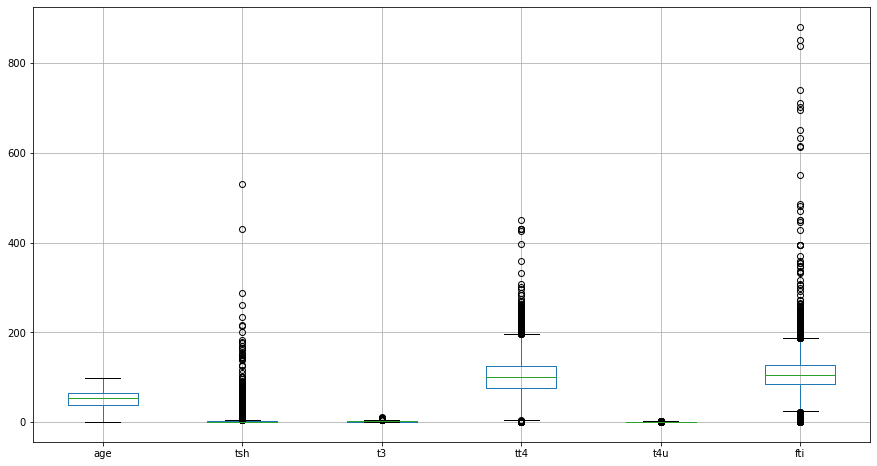

In [23]:
# Checking for outliers using boxplots
hypo.boxplot(figsize=(15, 8), fontsize=10)

# print size of the data with outliers present
print(hypo.shape)

In [24]:
# checking for outliers using the IQR technique
columns = hypo[['age','tsh','t3','tt4','t4u','fti']]
Q1 = columns.quantile(0.25)
Q3 = columns.quantile(0.75)

IQR = Q3 - Q1

outliers = ((columns < Q1 - 1.5 * IQR) | (columns > Q3 + 1.5 * IQR))
 
outliers.value_counts().sum()

3163

In [25]:
# viewing the outliers
columns[outliers.any(axis=1)]

,age,tsh,t3,tt4,t4u,fti
0,72.0,30.00,0.6,15.0,1.48,10.0
1,15.0,145.00,1.7,19.0,1.13,17.0
2,24.0,0.00,0.2,4.0,1.00,0.0
3,24.0,430.00,0.4,6.0,1.04,6.0
4,77.0,7.30,1.2,57.0,1.28,44.0
...,...,...,...,...,...,...
3139,77.0,0.00,0.0,163.0,0.81,202.0
3150,15.0,0.00,0.0,188.0,0.73,258.0
3151,58.0,0.30,3.1,151.0,1.40,108.0
3154,72.0,0.01,1.1,240.0,1.07,223.0


There are 3163 outliers. This number of outliers is > 10% of our total observations and similar to the shape of our dataset hence we will not drop any outlier. In addition, removing the outliers would result in an inconclusive result because they could still be viable submissions.

In [26]:
# Dealing with our outliers
# Lets check whether our outliers influence whether someone gets hypothyroid.
col_out = columns[outliers.any(axis=1)].index

hypo.iloc[col_out]['status'].value_counts(normalize=True) * 100

negative       85.01006
hypothyroid    14.98994
Name: status, dtype: float64

In [27]:
# Frequency of our data ststus column
print(hypo.status.value_counts())
print(hypo.iloc[col_out]['status'].value_counts())

negative       3012
hypothyroid     151
Name: status, dtype: int64
negative       845
hypothyroid    149
Name: status, dtype: int64


85% of our outliers are for the negative thyroid tests. 

15% of our outliers are for the positive with hpothyroid test.

Although 151 people tested positive for hypothyroidism, our outliers show that nearly all of those who tested positive are outliers.

Hence we will not drop our outliers.


In [28]:
# There are no anomalies within our dataset.

## Exploratory Data Analysis

### Univariate Analysis

Summary statistics for our dependent variable

In [28]:
# Creating a Frequency table of column status categories and using the value_counts() function
hypo.status.value_counts()

negative       3012
hypothyroid     151
Name: status, dtype: int64

Majority of those who tested were found to be negative.

In [29]:
# Creating a Frequency table of column sex categories and using the value_counts() function
hypo.sex.value_counts()

F          2182
M           908
Unknown      73
Name: sex, dtype: int64

Majority of those who tested were women.

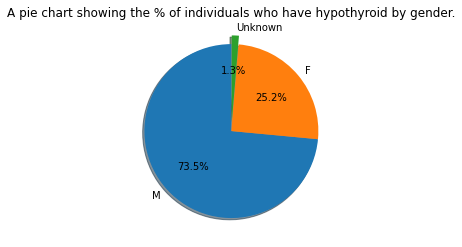

In [30]:
# Checking to see which sex is more susceptible to hypothyroid
hypo_positive = hypo[hypo['status']=='hypothyroid'] 
p = hypo_positive.groupby('sex')['status'].count()

explode = explode = (0,0,0.1)

labels = hypo_positive['sex'].unique()

plt.title('A pie chart showing the % of individuals who have hypothyroid by gender.')
plt.pie(p,labels=labels,explode=explode,autopct='%1.1f%%',startangle=90,shadow=True);

We can observe that more male individuals had hypothyroid(73.5%) compared to females(25.2%). 

#### Measures of central tendency

In [31]:
# Calculating the mean of our column int features
cols = columns.columns

for i, col_val in enumerate(cols):
 print('The mean of ' + str(col_val) + ' ' + 'is' + ' ' + str(columns[col_val].mean()))

The mean of age is 51.555485298766996
The mean of tsh is 5.046781536515964
The mean of t3 is 1.5135314574770784
The mean of tt4 is 100.28103066708822
The mean of t4u is 0.901501738855515
The mean of fti is 106.38631046474866


In [32]:
# Calculating the mode of our column features
cols = columns.columns

for i, col_val in enumerate(cols):
 print('The mode of ' + str(col_val) + ' ' + 'is' + ' ' + str(columns[col_val].mode()))

The mode of age is 0    54.0
dtype: float64
The mode of tsh is 0    0.0
dtype: float64
The mode of t3 is 0    0.0
dtype: float64
The mode of tt4 is 0    0.0
dtype: float64
The mode of t4u is 0    0.0
dtype: float64
The mode of fti is 0    0.0
dtype: float64


The most recorded age was 54 yrs.

In [33]:
# Calculating median
cols = columns.columns

for i, col_val in enumerate(cols):
 print('The median of ' + str(col_val) + ' ' + 'is' + ' ' + str(columns[col_val].median()))

## our most recorded age was 54 which makes sense as it is the median for age. 

The median of age is 54.0
The median of tsh is 0.4
The median of t3 is 1.6
The median of tt4 is 100.0
The median of t4u is 0.94
The median of fti is 105.0


#### Measures of dispersion

In [34]:
# Measuring kurtosis

cols = columns.columns

for i, col_val in enumerate(cols):
 print('The kurtosis of ' + str(col_val) + ' ' + 'is' + ' ' + str(columns[col_val].kurt()))


The kurtosis of age is -0.6214282150031365
The kurtosis of tsh is 178.5531388477672
The kurtosis of t3 is 4.457922036707946
The kurtosis of tt4 is 3.873764608927379
The kurtosis of t4u is 2.3202979478977444
The kurtosis of fti is 32.531516756574135


In [36]:
# Measuring skewness

cols = columns.columns

for i, col_val in enumerate(cols):
 print('The skewnwss of ' + str(col_val) + ' ' + 'is' + ' ' + str(columns[col_val].skew()))

The skewnwss of age is -0.24117673338110115
The skewnwss of tsh is 11.04189326628568
The skewnwss of t3 is 1.1394461536969123
The skewnwss of tt4 is 0.693851580480299
The skewnwss of t4u is -0.91477893193258
The skewnwss of fti is 3.6332812907092933


**Histograms**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


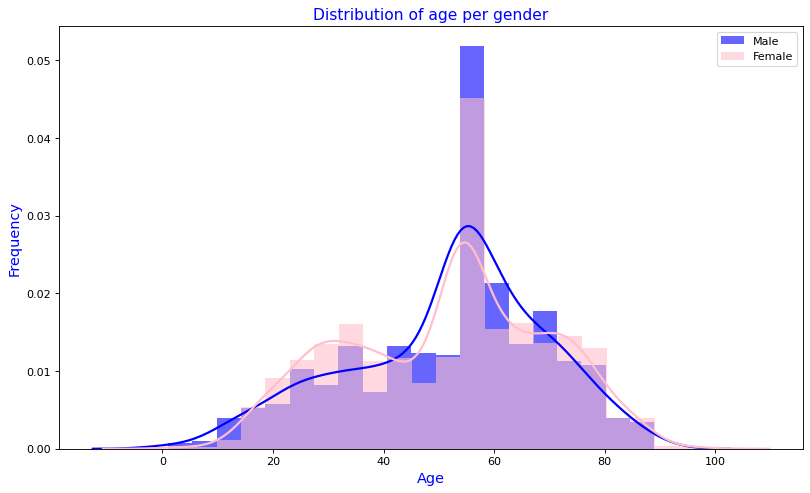

In [37]:
# Plotting histogram to show distribution of age per gender

male = hypo.loc[hypo.sex=='M', 'age']    # Selecting only male datapoints in the age column
female = hypo.loc[hypo.sex=='F', 'age']  # Selecting only female datapoints in the age column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms

plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="blue", label="Male", **kwargs)
sns.distplot(female, color="pink", label="Female", **kwargs)
plt.title('Distribution of age per gender', fontsize = 14, color = 'blue')
plt.xlabel('Age', fontsize = 13, color = 'blue')
plt.ylabel('Frequency', fontsize = 13, color = 'blue')
plt.legend()
plt.show()

both the ages of male and female are skewed to the left.

### Bivariate analysis

<Figure size 480x320 with 0 Axes>

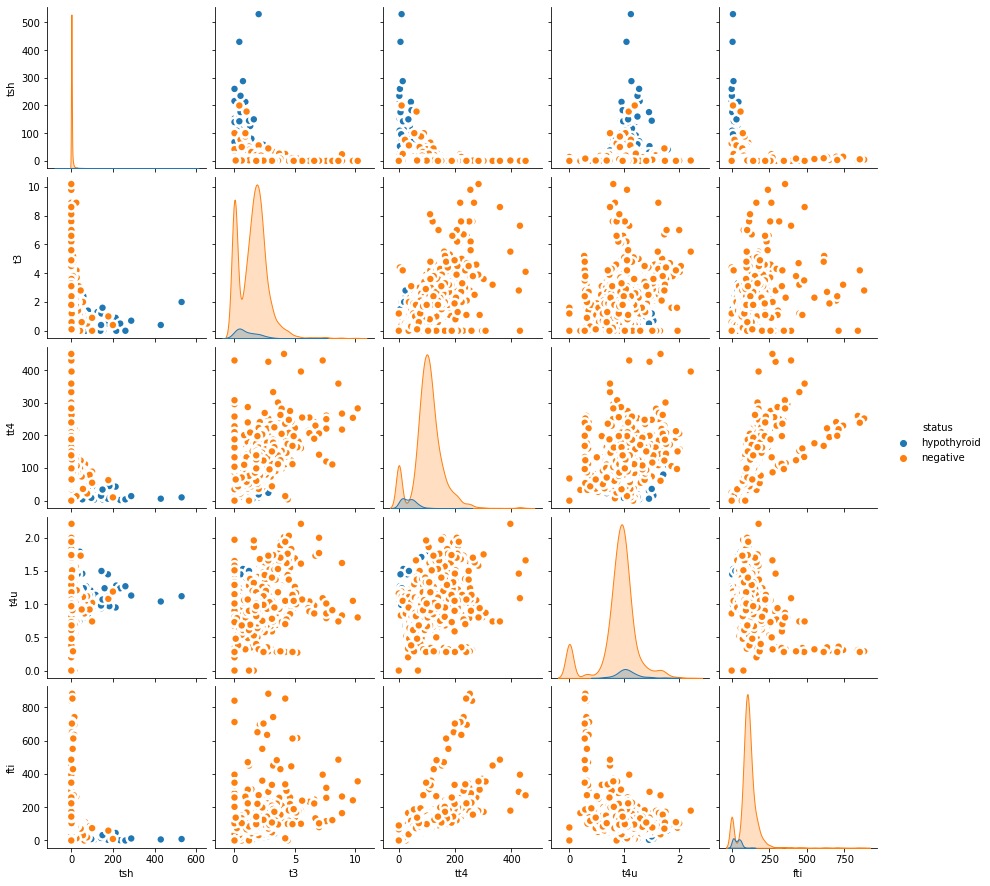

In [38]:
# plotting pairplots
plt.figure(dpi= 80)
sns.pairplot(hypo[['tsh', 't3', 'tt4', 't4u', 'fti', 'status']], kind="scatter", hue="status", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

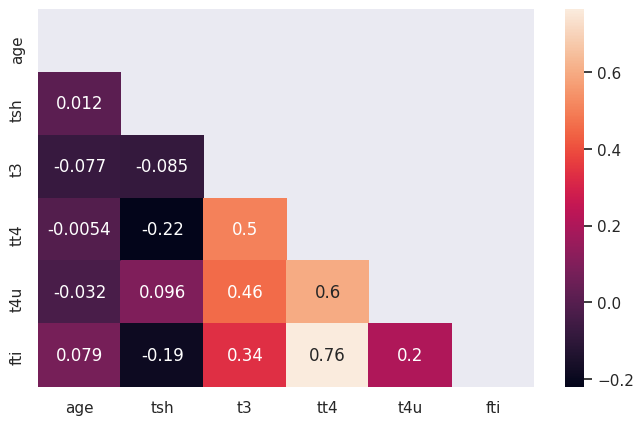

In [38]:
# Ploting a heatmat
# using seaborn 
# 
sns.set(style = 'darkgrid', context = 'notebook')
corr = hypo.corr()
plt.figure(dpi = 100, figsize = (8,5))
heatmap = np.zeros_like(hypo.corr(), dtype=np.bool)
heatmap[np.triu_indices_from(heatmap)] = True
sns.heatmap(hypo.corr(), annot=True, mask=heatmap)
plt.show()

T4U and TT4 are two strongly correlated variables, as are FTI and TT4.

We will investigate them while determining the importance of each feature.

## Feature engineering

In [39]:
# viewing our dataset
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


In [40]:
# removing the measured columns because we only need the values column to predict whether 
#or not someone will develop hypothyroidism.
hypo.drop(['tsh_measured','t3_measured','tt4_measured','t4u_measured','fti_measured'], axis = 1, inplace = True)

In [41]:
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh,t3,tt4,t4u,fti
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0



## Implementing the solution

### Importing wandb





In [43]:
#!pip install wandb


In [44]:
#import wandb

In [45]:
#wandb.login()

### Decision Trees

####  **Random Forest**

In [42]:
# Importing our libraries for our model.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [43]:
# Splitting the independent and dependent variables
hypo_random = hypo

X = hypo_random.drop('status', axis = 1)
y = np.where(hypo_random.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
X = pd.get_dummies(X)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [44]:
# Training our model with default parameters 
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 2, max_depth= None)
forest = forest.fit(X_train, y_train)

In [45]:
# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.041096,0.038988
std,0.198617,0.193669
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [46]:
# Evaluation
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.014752370916754479
Mean Squared Error: 0.014752370916754479
Root Mean Squared Error: 0.1214593385325084


In [47]:
# acuracy score
print('Our accuracy score:',accuracy_score(y_test, y_pred))

Our accuracy score: 0.9852476290832455


Our accuracy score is 98.5%. There is a chance of overfitting.

Feature Importance

In [48]:
# Geting features that contribute to the prediction of hypothyroid
importances = forest.feature_importances_

# Sort the feature importance in descending order

sorted_indices = np.argsort(importances)[::-1]

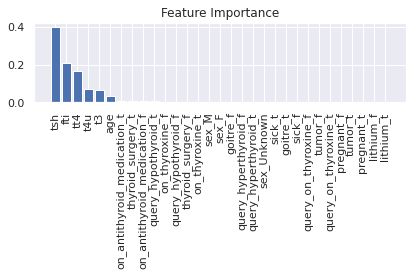

In [49]:
# Visualize the importance
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Our most important features to predict whether and individual has hypothyroid are: tsh,fti,tt4,t4u,t3 and age

**Modelling with the most important features**

In [50]:
# Modelling 

X = X[['age','tsh', 't3', 'tt4', 't4u', 'fti']]
y = np.where(hypo_random.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Training the model
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 2, max_depth= None)
forest = forest.fit(X_train, y_train)

In [51]:
# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.041096,0.042150
std,0.198617,0.201036
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [56]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.011591148577449948
Mean Squared Error: 0.011591148577449948
Root Mean Squared Error: 0.1076621966033108


Our RMSE has dropped from 0.121 to 0.108. The model has performed better with the important features. 

In [52]:
# acuracy score
print('Our accuracy score:',accuracy_score(y_test, y_pred))
print('The f1 score is:', {metrics.f1_score(y_test, y_pred)})

Our accuracy score: 0.9884088514225501
The f1 score is: {0.8607594936708861}


In [58]:
confusion_matrix(y_test, y_pred)

array([[904,   6],
       [  5,  34]])

Our accuracy score is still at 98% still showing signs of overfitting.

**Tuning the parameters**

In [53]:
# Creating a dictionary of parameters to tune
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5],
          'min_samples_split':[0.1, 1.0, 10]}

# Set the number of folds and begin running the model.

kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables

search.fit(X, y)

# Checking for the best parameters

print(f'The best parameters: {search.best_params_}')

The best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 20}


The best parameters for our random forest model is:
- max_depth = 5
- n_estimators = 20
- min_samples_split = 10

In [54]:
# Let's use the best parameters in our model
X = X[['age','tsh', 't3', 'tt4', 't4u', 'fti']]
y = np.where(hypo_random.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Training the model
forest = RandomForestClassifier(n_estimators = 20, random_state=42, min_samples_split = 10, max_depth= 5)
forest = forest.fit(X_train, y_train)

In [55]:
# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.041096,0.038988
std,0.198617,0.193669
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [56]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01685985247629083
Mean Squared Error: 0.01685985247629083
Root Mean Squared Error: 0.1298454946322391


In [57]:
print('The f1 score is:', {metrics.f1_score(y_test, y_pred)})

The f1 score is: {0.7894736842105263}


The RMSE has increased significantly in relation to our previous model.

Better parameters should be looked into and used.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


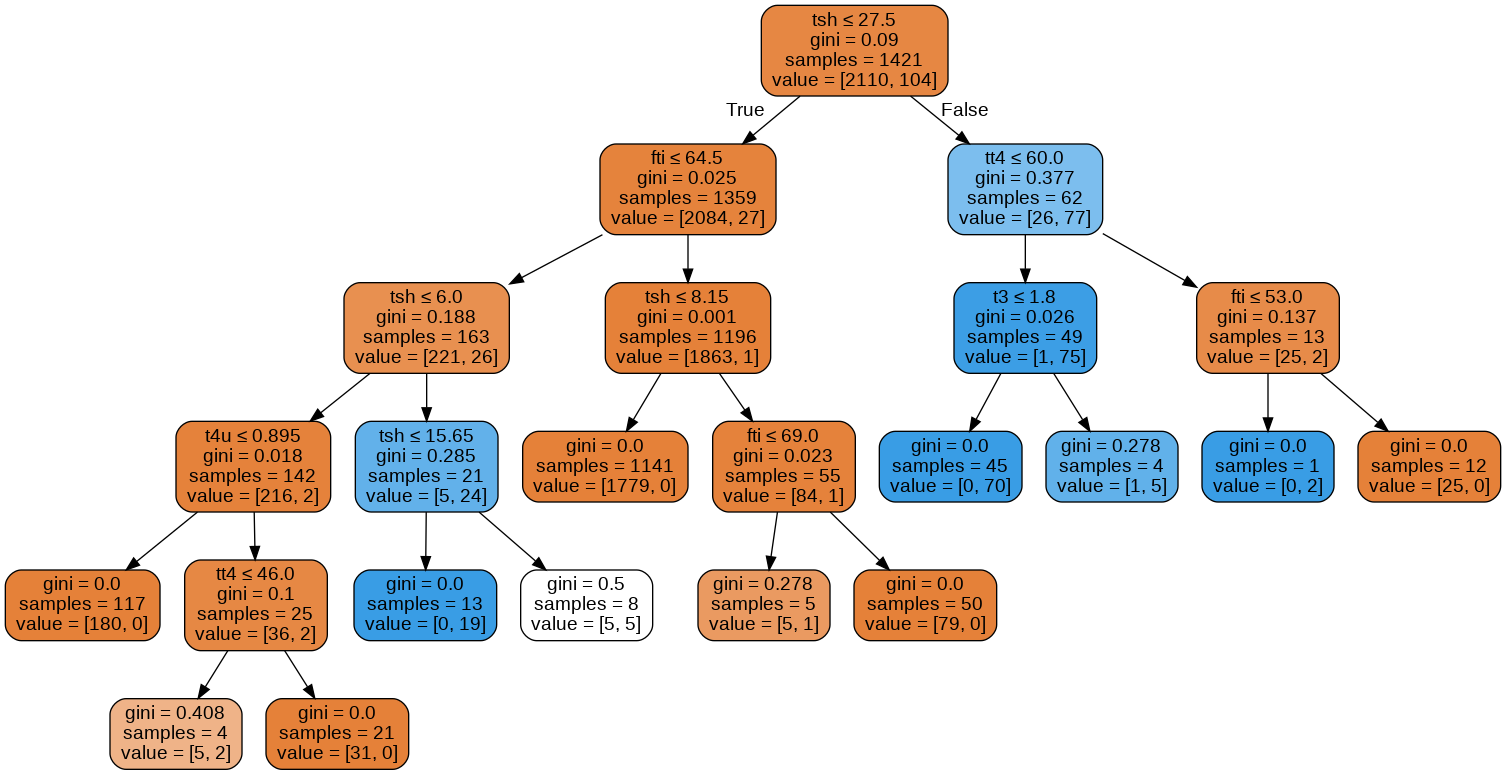

In [58]:
# Visualizing the 5th tree from the forest
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

tree = forest.estimators_[5]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [59]:
# Performing cross validation of ten folds
scores = cross_val_score(forest,X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores

print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean

print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.8839550117414412
Standard deviation of the cross validation scores is 0.04567368402025552


The score of our model is  ~ 88% with a variance of 0.04567

#### Adaboost Classifier

In [60]:
# Selecting the independent variables and the target variable
hypo_ada = hypo

X = hypo_ada.drop('status', axis = 1)
y = np.where(hypo.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Training the model
forest = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=100)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.041096,0.041096
std,0.198617,0.198617
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [61]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01053740779768177
Mean Squared Error: 0.01053740779768177
Root Mean Squared Error: 0.10265187673726073


In [62]:
# acuracy score
print('Our accuracy score:',accuracy_score(y_test, y_pred))
print('The f1 score is:', {metrics.f1_score(y_test, y_pred)})

Our accuracy score: 0.9894625922023182
The f1 score is: {0.8717948717948718}


Our accuracy score is 98.89%.

**Feature selection**

In [63]:
# Geting features that contribute to the prediction of hypothyroid
importances = forest.feature_importances_

# Sort the feature importance in descending order

sorted_indices = np.argsort(importances)[::-1]

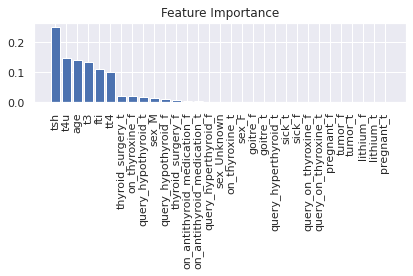

In [64]:
# Visualize the importance
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Our most important features to predict whether and individual has hypothyroid are: age,tsh,fti,t4u,t3 and tt4

In [65]:
# Let's train with our importance features
# Let's use the best parameters in our model
X = X[['age','tsh', 't3', 'tt4', 't4u', 'fti']]
y = np.where(hypo_random.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Training the model
forest = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=100)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.041096,0.044257
std,0.198617,0.205774
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [66]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0136986301369863
Mean Squared Error: 0.0136986301369863
Root Mean Squared Error: 0.11704114719613055


The RMSE score has increased compared to our previous model from 0.1077 to 0.1170

In [67]:
# acuracy score
print('Our accuracy score:',accuracy_score(y_test, y_pred))
print('The f1 score is:', {metrics.f1_score(y_test, y_pred)})

Our accuracy score: 0.9863013698630136
The f1 score is: {0.8395061728395062}


Our accuracy score is 98.42%

**Tuning our parameters**

In [68]:
# Creating a dictionary of parameters to tune
params = {'n_estimators': [10, 20, 30, 50, 100],
         'learning_rate': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model

kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables

search.fit(X, y)

# Checking for the best parameters

print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'learning_rate': 1, 'n_estimators': 50}


In [69]:
# Let's use the best parameters in our model
X = X[['age','tsh', 't3', 'tt4', 't4u', 'fti']]
y = np.where(hypo_random.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Training the model
forest = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=30,learning_rate=1)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.041096,0.042150
std,0.198617,0.201036
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [70]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.015806111696522657
Mean Squared Error: 0.015806111696522657
Root Mean Squared Error: 0.12572235957268166


Our RMSE score has increased signifcantly to 0.1257

In [71]:
# acuracy score
print('Our accuracy score:',accuracy_score(y_test, y_pred))
print('The f1 score is:', {metrics.f1_score(y_test, y_pred)})

Our accuracy score: 0.9841938883034773
The f1 score is: {0.810126582278481}


Our accuracy score is 98.42% similar to our previous model. 

Our f1 score is 81%

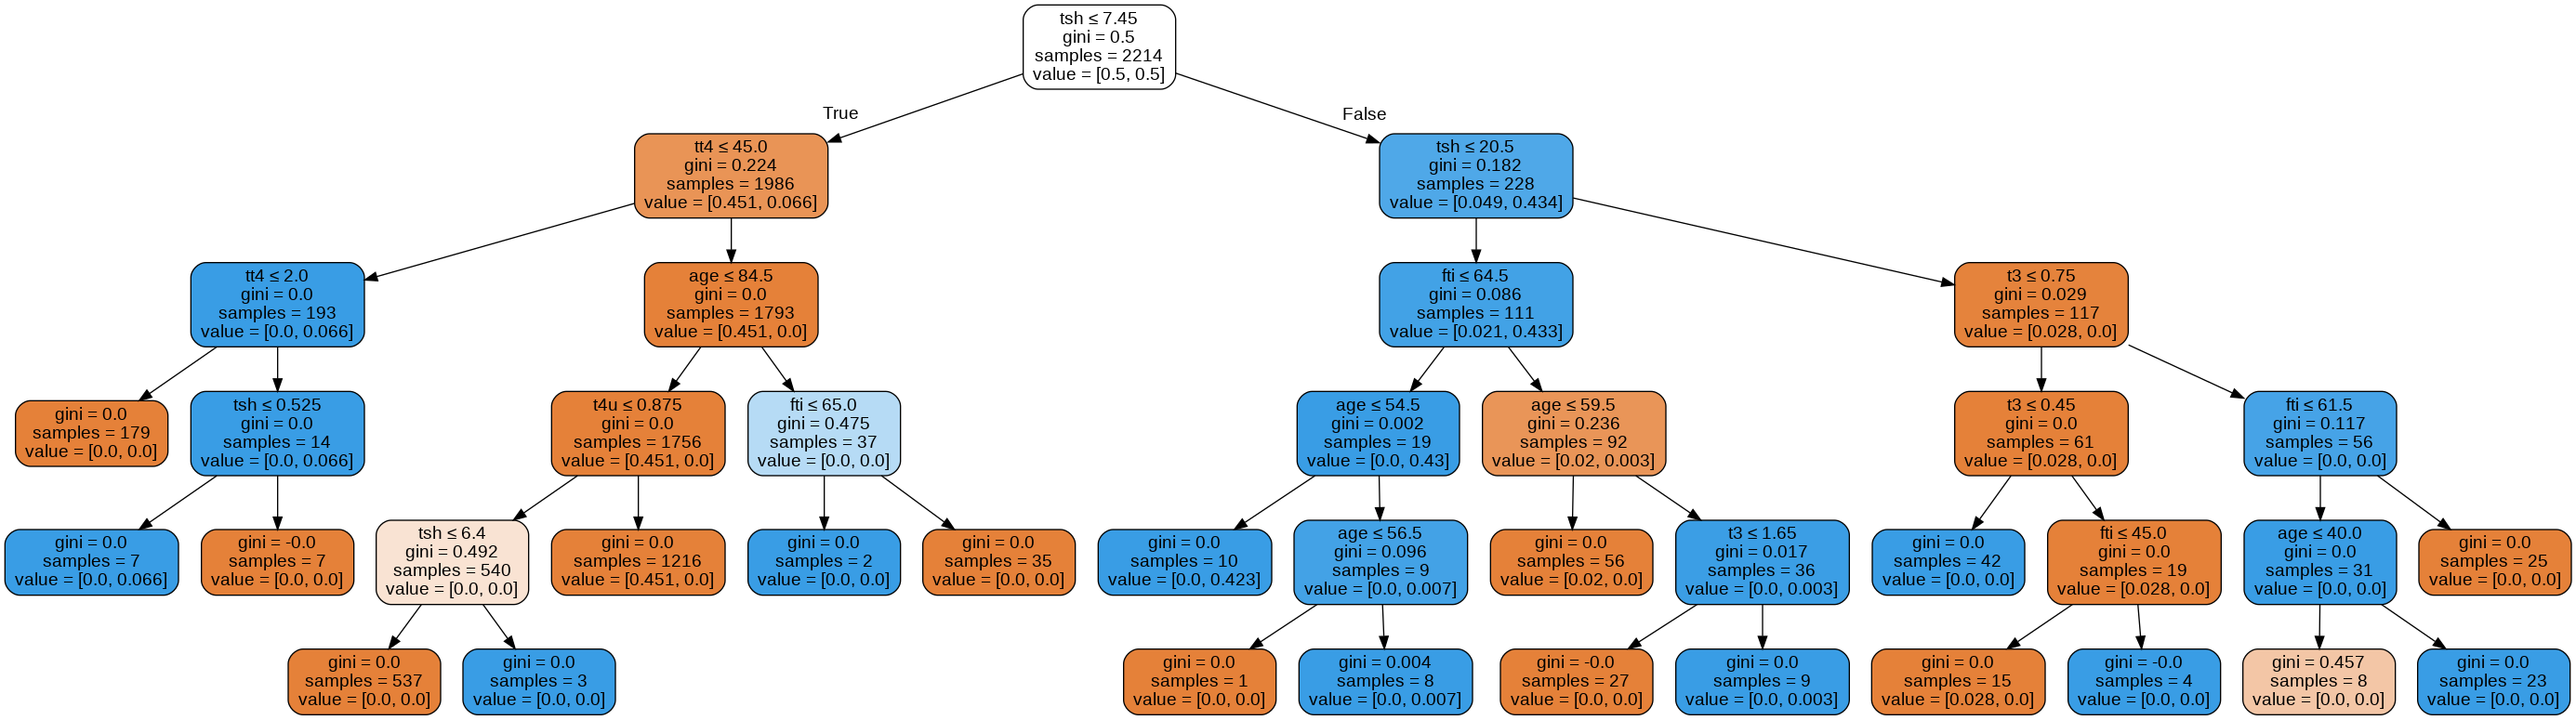

In [72]:
# Let's visualize our tree
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[5]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [73]:
# Performing cross validation of ten folds
scores = cross_val_score(forest,X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores

print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean

print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.8463862528934831
Standard deviation of the cross validation scores is 0.040268727543662924


When Ada is compared to Random Forest, Random Forest is a better model with a f1 of 88 percent, while Ada Boost has a f1 of 85 percent.

#### Gradient Boosting



**Tuning parameters we are to use**

In [74]:
# Creating a dictionary of parameters to tune
params = {'n_estimators': [10, 20, 30, 50, 100],
         'min_samples_split': [0.1,1.0,10]}

# Setting the number of folds to 10 and instantiating the model

kfold = KFold(n_splits=10, shuffle=True)
model = GradientBoostingClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables

search.fit(X, y)

# Checking for the best parameters

print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'min_samples_split': 0.1, 'n_estimators': 20}


In [75]:
# Selecting the independent variables and the target variable
hypo_grad = hypo

X = hypo_grad.drop('status', axis = 1)
y = np.where(hypo.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Training the model
forest = GradientBoostingClassifier(max_depth=5,n_estimators=30,min_samples_split=0.1)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe() 

,Actual,Predicted
count,949.000000,949.000000
mean,0.041096,0.042150
std,0.198617,0.201036
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [76]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.011591148577449948
Mean Squared Error: 0.011591148577449948
Root Mean Squared Error: 0.1076621966033108


In [77]:
# accuracy score
print('Our accuracy score:',accuracy_score(y_test, y_pred))
print('The f1 score is:', {metrics.f1_score(y_test, y_pred)})

Our accuracy score: 0.9884088514225501
The f1 score is: {0.8607594936708861}


In [78]:
# Performing cross validation of ten folds
scores = cross_val_score(forest,X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores

print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean

print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.9143356374807986
Standard deviation of the cross validation scores is 0.04196186512991762


Gradient boost has performed better f1 (91.4%) than Random Forest which has a model with a f1 of 88 percent and Ada Boost has a f1 of 85 percent.

In [85]:
#wandb.init(project='hypothyroid_prediction')

In [86]:
#wandb.sklearn.plot_regressor(forest, X_train, X_test, y_train, y_test, model_name='GradientBoosting')

#### Support Vector Machine

The best features for classifying patients, according to the tuned random forest and adaboost models, are: FTI, T3, TSH, TT4, T4U, and age. We will train our svm model by fitting it with these features as well as features chosen through PCA.

In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Linear kernel,Polynomial kernel and rbf kernel**

In [80]:
# Splitting the independent and dependent variables
from sklearn.svm import SVC
hypo_SVC = hypo

X = hypo_SVC[['age','tsh', 't3', 'tt4', 't4u', 'fti']]
y = np.where(hypo_random.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
X = pd.get_dummies(X)
# Creating model objects 
poly_svc = SVC(kernel='poly')
linear_svc = SVC(kernel = 'linear')
rbf_svc= SVC(kernel ='rbf')

In [81]:
# Creating a list of the models and model names

models = [poly_svc, linear_svc, rbf_svc]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model

def predictor(model, X, y):
  # Train using 70% of the data.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  
  # Training our model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = metrics.f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')  

The accuracy score of Polynomial is: 0.9662802950474183 and the f1 score is: 0.42857142857142866
The accuracy score of Linear     is: 0.9768177028451 and the f1 score is: 0.6944444444444444
The accuracy score of Rbf        is: 0.9778714436248683 and the f1 score is: 0.7042253521126761


The SVC model using linear kernel has a 97.68% accuracy and 69% f1 score.

The accuracy score for polynomial kernel is 96.63% and f1 score of 42.9%.This is slightly higher compared to the model using a linear kernel.

The accuracy score for rbf kernel is 97.79% and f1 score 70%. This model has performed better than the linear kernel and polynomial kernelmodel.

We will use the rbf kernel model when tuning our parameters.

**Tuning our parameters**

In [83]:
# Creating a dictionary of parameters to tune
params = {'C': np.arange(1, 102, 10),
         'gamma': np.linspace(2**-5, 2**5, 10)}

# Setting the number of folds to 10 
kfold = KFold(n_splits=3, shuffle=True)
model = SVC(kernel = 'rbf')

search = RandomizedSearchCV(model, param_distributions=params, scoring = 'f1', cv = kfold, random_state = 0)

# Selecting the independent variables and the target variable
X = hypo_SVC[['age','tsh', 't3', 'tt4', 't4u', 'fti']]
y = np.where(hypo_SVC.status == 'hypothyroid', 1, 0)

# Fitting the grid search with the X and the y variables
search.fit(X, y)

# Checking for the best parameters
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'gamma': 0.03125, 'C': 11}


Modelling with the parameters

In [84]:
hypo_SVC = hypo
tree_f =  hypo_SVC[['age','tsh', 't3', 'tt4', 't4u', 'fti']]
X = hypo_SVC[['age','tsh', 't3', 'tt4', 't4u', 'fti']]
X_pca = hypo_SVC.drop('status', axis=1)
Y = np.where(hypo_SVC.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
X_tree = pd.get_dummies(X)
X_pca = pd.get_dummies(X_pca)

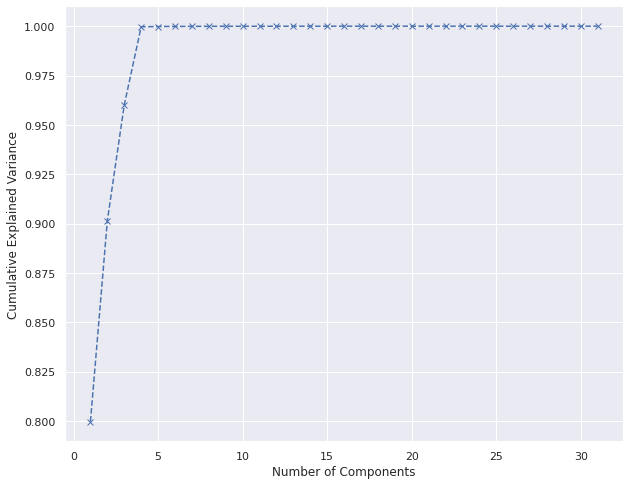

In [85]:
# Apply pca
pca = PCA().fit(X_pca)

# getting the explained variance ratio
evr = pca.explained_variance_ratio_
range_length = len(evr) + 1

# plotting the explained variance ratio so we can determine how any principal components to keep
plt.figure(figsize = (10, 8))
plt.plot(__builtin__.range(1, range_length), evr.cumsum(), marker = 'x', linestyle = '--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

4 features explain the variance in our data.

In [86]:
# Reduce our feature set to components
pca_x = PCA(n_components=4).fit_transform(X_pca)

In [87]:
# Splitting our data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(pca_x, Y, test_size=.3, stratify=Y)
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(tree_f, Y, test_size=.3, stratify=Y)

In [88]:
# Standard features
scaler_tree = StandardScaler().fit(x_train_tree)
x_train_tree = scaler_tree.transform(x_train_tree)
x_test_tree = scaler_tree.transform(x_test_tree)

scaler_pca = StandardScaler().fit(x_train)
x_train = scaler_pca.transform(x_train)
x_test = scaler_pca.transform(x_test)

In [89]:
# Model training and fitting with rbf
svc = SVC(C = 11, gamma =0.03125, kernel='rbf')
svc_pca = SVC(kernel='rbf', probability=True).fit(x_train, y_train)
svc_tree = SVC(kernel = 'rbf', probability=True).fit(x_train_tree, y_train_tree)
# Making predictions
y_pred_pca = svc_pca.predict(x_test)
y_pred_tree = svc_tree.predict(x_test_tree)
# Measuring the accuracy of the model
#
print(f'The accuracy score is(pca features): {accuracy_score(y_test, y_pred_pca)} and the f1 score is {metrics.f1_score(y_test, y_pred_pca)}')
print(f'The accuracy score is(tree features): {accuracy_score(y_test_tree, y_pred_tree)} and the f1 score is {metrics.f1_score(y_test_tree, y_pred_tree)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}',': pca features')
print(f'{classification_report(y_test_tree, y_pred_tree)}',': tree features')
confusion_matrix(y_test, y_pred)

The accuracy score is(pca features): 0.9789251844046365 and the f1 score is 0.75
The accuracy score is(tree features): 0.9831401475237092 and the f1 score is 0.8048780487804879


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       904
           1       0.07      0.07      0.07        45

    accuracy                           0.92       949
   macro avg       0.51      0.51      0.51       949
weighted avg       0.91      0.92      0.91       949
 : pca features
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.89      0.73      0.80        45

    accuracy                           0.98       949
   macro avg       0.94      0.86      0.90       949
weighted avg       0.98      0.98      0.98       949
 : tree features


array([[867,  37],
       [ 42,   3]])

Features selected by decison trees have better performance than the pca reduced data. However the support vector model perform extremely well and is almost at par with the tree models.

In [90]:
# Performing cross validation of ten folds

scores = cross_val_score(svc, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores

print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean

print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.23390952872377024
Standard deviation of the cross validation scores is 0.09693142802213771


Gradient boost outperforms the other three models (Ada, RandomForest, and SVC), followed by RandomForest, AdaBoost, and SVC.

### Conclusion

- Overall the best model fpr Support Vector Classifier using the rbf kernel at 97.79% accuracy and f1 score of 70%.

- For the Ensemble methods: Gradient Boosting and Ada Boost Classifier models, Random Forest, Gradient Boosting performed best with 91.4%.

- The most important features to use for the prediction were age,tsh, t3, tt4, t4u,fti.

- There were several instances of overfitting.This may have been caused by inadequate data to train the models.
